# Histogram Equalization

- Technique used to redistribute intensity values equally among image to give contrast and brightness. 
- Mainly used in medical to enhance x-ray images , in satellite images to improve contrast in images, visibility. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("../images/test_img.jpg")

if image is None:
    print("Cant load the image")
else:
    print("Image loaded successfully")

Image loaded successfully


In [3]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # equalize the intensity or brightness so we need gray scale 

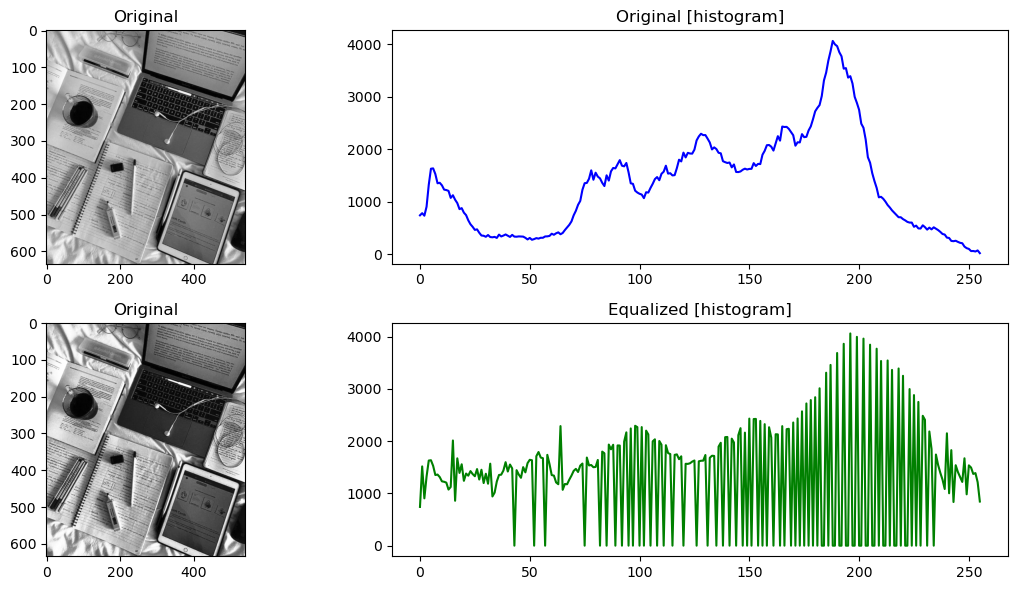

In [7]:
hist, bins = np.histogram(image_gray.flatten(), 256, [0,256]) # (image.flatten(), bins, range)

# perform histogram equalization 
equalized_image = cv2.equalizeHist(image_gray)

equalized_hist, bins = np.histogram(equalized_image.flatten(), 256, [0,256])

plt.figure(figsize=(12,6))

plt.subplot(2,2,1) 
plt.imshow(image_gray, cmap="grey")
plt.title("Original")

plt.subplot(2,2,2) 
plt.plot(hist, color="blue")
plt.title("Original [histogram]")

plt.subplot(2,2,3) 
plt.imshow(equalized_image, cmap="gray")
plt.title("Original")

plt.subplot(2,2,4) 
plt.plot(equalized_hist, color="green")
plt.title("Equalized [histogram]")

plt.tight_layout()
plt.show()



As we have done for grayscale image we have to do the same for rgb image, but changing brightness alone can affect all the channels in an image, so to focus only on brightness/lightness take that alone and merge other channels later. 
LAB - L - lightness; A, B - color information 
YUV - Y - luminous/intensity of image; U - blue component; V - red component - used in media (broadcasting television); U + V = Green 


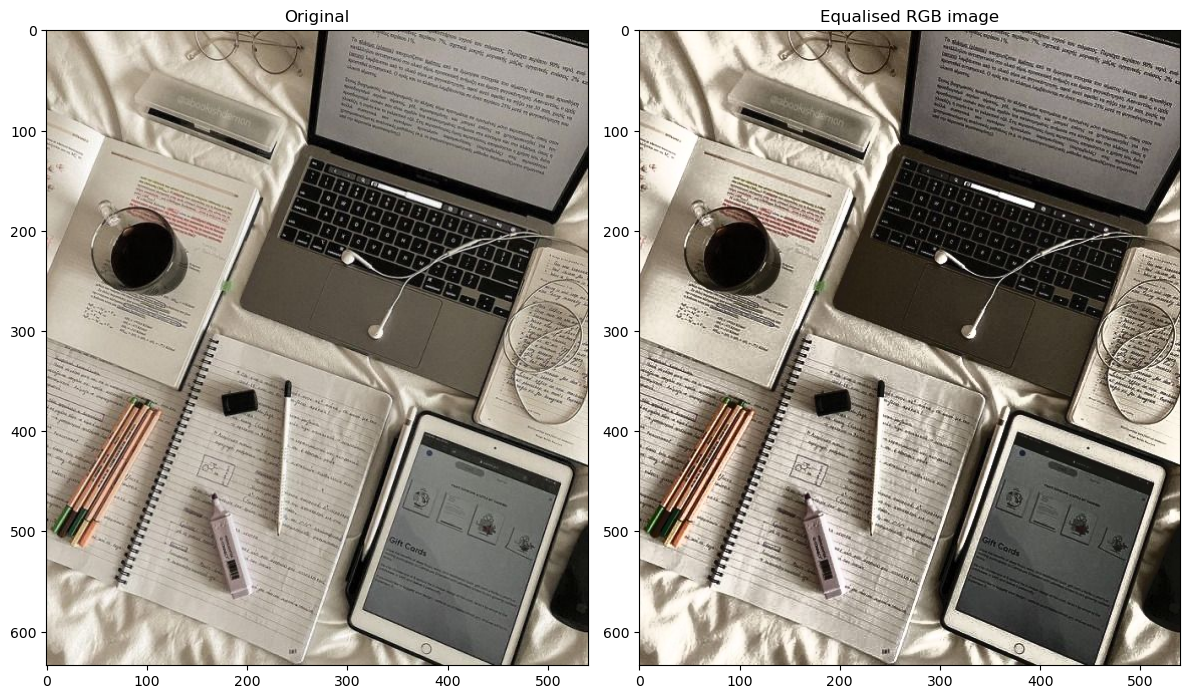

In [9]:
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0]) # keep all rows and cols intact and change only y channel

equalized_color_img = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)
equalized_color_img = cv2.cvtColor(equalized_color_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,8))

plt.subplot(1,2,1) 
plt.imshow(image_rgb)
plt.title("Original")

plt.subplot(1,2,2) 
plt.imshow(equalized_color_img)
plt.title("Equalised RGB image")


plt.tight_layout()
plt.show()